<a href="https://colab.research.google.com/github/alanmlewis/ProgrammingforChem/blob/main/Huckel_Theory/Huckel_Theory_Syntax_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **PC LAB: Understanding $\pi$-Conjugated Molecules with Hückel Theory**
---

This workshop will introduce the ideas of Hückel Theory, which is a way of calculating molecular orbitals. It will then give you the Python tools you need to perform Hückel Theory calculations, calculate trends in the energy of conjugated a::lkenes, and make predictions about the selectivity of organic reactions.

## **Section A: What is Hückel Theory?**
---

Hückel Theory describes how $\pi$-electrons behave in conjugated systems, like those shown below, and provides a simplified way of predicting the chemical properties of those molecules. It is a very simple *electronic structure theory*; you'll learn more about these theories later this year in the course. It is based on a number of assumptions:
*   Electrons in $\pi$ orbitals don't interact with electrons in $\sigma$ orbitals.
*   Molecular orbitals are built from a linear combination of atomic p orbitals.
*   The system is defined by two parameters:
    *  $\alpha$, the energy of an electron in a p orbital.
    *  $\beta$, the interaction energy of two neighbouring p orbitals.
*   Orbitals which aren't neighbours don't interact.

![Benzene](https://drive.google.com/uc?id=1QnNmG6GaSz6j2b43j9u82Oxv_fZ8mB_v) ![Hexatriene](https://drive.google.com/uc?id=1I_RMYY3BlhPBOckaY4kQwrp1hXC661Kf)

### **Mathematics of Hückel Theory**

The behaviour of any quantum mechanical system is defined by a Hamiltonian. You have seen the Schr&ouml;dinger equation before, which tells us the allowed energies of a quantum mechanical system E:
$$
\hat{H}\psi = E\psi
$$
Often the Hamiltonian is written as function, perhaps of the position of a particle. However, we can also write the Hamiltonian as a matrix and $\psi$ as a vector:
$$
\mathbf{H}\psi_i = E_i\psi_i \\
$$
$$
\mathbf{H} = \left(\array{h_{11} & h_{12} & h_{13} & h_{14} \\ h_{21} & h_{22} & h_{23} & h_{24} \\ h_{31} & h_{32} & h_{33} & h_{34} \\h_{41} & h_{42} & h_{43} & h_{44}} \right); \psi_i = \left(\array{c_1 \\ c_2 \\ c_3 \\ c_4} \right) \\
$$
To understand a matrix, we have to know what *basis* it is written in. In Hückel theory, the *basis* consists of the atomic p orbital on each atom. That gives us a way to understand the numbers above: $c_1$ is the amount that the p orbital on atom number 1 contibutes to the molecular orbital $i$; the number $h_{12}$ is the interaction energy between the p orbital on atom 1 and the p orbital on atom 2.

When faced with an equation like this one, the goal is to find the pairs of vectors $\psi_i$ and numbers $E_i$ which satisfy the equation. This is done by a mathematical technique called diagonalisation. Doing this by hand is very difficult; computers are very good at it. We'll see how to use Python to solve these equations.

## **Section B: Programming Background**
---

In order to use Hückel theory and the mathematics behind it, we first need to introduce some key programming concepts. The first of these is called an "array" - this is Python's way of storing vectors and matrices. These are defined using functions from a library called numpy. The code block below gives some examples of how we can make vectors and matrices using numpy. Click the "play" button to run the code and see what it produces.

In [ ]:
import numpy as np

# This command creates a vector with 8 elements in it, and every element is the number one.
vec = np.ones(8)
print(vec)

# This command creates a (5x2) matrix with every element equal to zero.
matrix = np.zeros((5,2))
print(matrix)

# This command creates a (4x4) matrix filled with random numbers between zero and one.
random_matrix = np.random.random((4,4))
print(random_matrix)

[1. 1. 1. 1. 1. 1. 1. 1.]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0.7560058  0.56238974 0.30361503 0.94312177]
 [0.75334107 0.47903667 0.51100083 0.07439832]
 [0.53828972 0.3713428  0.63673802 0.26686592]
 [0.99786241 0.39176454 0.72836437 0.28280496]]


In Python, we sometimes need to get a specific number or numbers out of an array. To do this, we use square brackets to specify which number(s) we want. Note that Python starts counting from 0 instead of 1. That means we can get the first number from a vector with the code `vector[0]`. To access matrices, we need to give the row and the column index of the number we want; the number in the fourth row and second column of a matrix can be accessed with the code `matrix[3,1]`.

**Exercise 1:** Write code in the box below which prints the element in the 3rd row of the 4th column of the random matrix we defined above.

In [ ]:
print(random_matrix[2,3])

0.2668659232683832


The first $m$ entries of a vector can be accessed using code like this: `vector[:m]`. We can do something similar with matrices; `matrix[:m,2]` will return the first $m$ elements of column 3. If we want a whole column, we can just use `:` instead of any numbers. For example, `matrix[2,:]` refers to the whole of the third row of `matrix`.

**Exercise 2:** Write code in the box below to first print every element in the second column of the random matrix, and then print the first three elements of the fouth row of the random matrix.

In [ ]:
print(random_matrix[:,1])
print(random_matrix[3,:3])

[0.56238974 0.47903667 0.3713428  0.39176454]
[0.99786241 0.39176454 0.72836437]


We can also change individual elements of a matrix or vector by setting them equal to a number, using the equals sign. Be careful though: if you don't specify which element of the matrix or vector you want to change, you will replace the whole matrix with a single number.

**Exercise 3:** Set the sixth element of the variable `vec` equal to 99, and then print the whole vector. Then set the variable `matrix` equal to -1, and print the result. You should have replaced the matrix with a single number!

In [ ]:
vec[5] = 99
print(vec)
matrix = -1
print(matrix)

[ 1.  1.  1.  1.  1. 99.  1.  1.]
-1


Having introduced array, we're going to move onto something new: "for loops". If we want to repeat our code many times, maybe changing a small thing every time, we could make a lot of copies of the code. But there is a better way: using a `for` loop. We can use this to define a list of values, and then run a chunk of code multiple times, each time with a variable set to the next value in the list. Note that everything you want to repeat in the loop should be indented using spaces, and should be indented by the same amount. For example:

In [ ]:
ns = [1,2,3]
for n in ns:
  print('At the moment the variable n is equal to:')
  print(n)

At the moment the variable n is equal to:
1
At the moment the variable n is equal to:
2
At the moment the variable n is equal to:
3


**Exercise 4:** Write a loop which prints the name of every person sat in your row on a new line.

In [ ]:
names = ['Alfred','Betty','Chris','Doreen']
for name in names:
  print(name)

Alfred
Betty
Chris
Doreen


Sometime we want to collect the result of the calculation we do each time we go through a loop into a list. Python has a neat way to do that. We can define an empty list using `list_variable = []`, and then add a number to it using the command `list_variable.append(number_variable)`. For example, the code below creates a list of square numbers. (Note that the final print statement is "outside" of the loop, because it isn't indented, and so is only printed once).

In [ ]:
ns = [1,2,3,4,5]
n_squared = []
for n in ns:
  n_squared.append(n**2)

print(n_squared)

[1, 4, 9, 16, 25]


**Exercise 5:** Write a loop which calculates the square root of every even number up to 10, and stores the answers in a list. There is a numpy function called `np.sqrt(x)` which will return the square root of a number x.


In [ ]:
ns = [2,4,6,8,10]
n_roots = []
for n in ns:
  root = np.sqrt(n)
  n_roots.append(root)

print(n_roots)

[1.4142135623730951, 2.0, 2.449489742783178, 2.8284271247461903, 3.1622776601683795]


## **Section C: An Example of Hückel Theory in Action**
---

Now that we've covered the tools we need, let's apply Hückel Theory to 1,3-butadiene.

![Butadiene](https://drive.google.com/uc?id=1D9YpzsfmZv-uj0WwrKoMRblJrpL40VKC)

We can write down the Hückel Hamiltonian for this molecule using the assumptions we introduced before:
*   Molecular orbitals are built from a linear combination of atomic p orbitals (i.e. the basis of our matrix is p orbitals).
*   The system is defined by two parameters:
    *  $\alpha$, the energy of an electron in a p orbital.
    *  $\beta$, the interaction energy of two neighbouring p orbitals.
*   Orbitals which aren't neighbours don't interact.
$$
\\
\mathbf{H} = \left( \array{\alpha & \beta & 0 & 0 \\ \beta & \alpha & \beta & 0 \\ 0 & \beta & \alpha & \beta \\ 0 & 0 & \beta & \alpha} \right)\\
$$

Now we need to write some code which defines that Hamiltonian in Python, and diagonalise it to find the energies and molecular orbitals. The next code block includes a function which defines a Hückel Hamiltonian for any linear hydrocarbon. We'll come back and look at how it works later. For now, just click the "play" button to run the code, and then move on.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def linear_Hamiltonian(n,alpha,beta):
  '''
  This function defines the Hückel Hamiltonian of a linear conjugated hydrocarbon
  You don't need to change this function!

  Arguments:
      n: the number of carbon atoms in the molecule
      alpha: the energy of a carbon p orbital
      beta: the interaction energy between neighbouring carbon atoms

  Retuns:
      H: The Hückel Hamiltonian

  '''

  # This line defines an nxn Hamiltonian full of zeros
  H = np.zeros((n,n))

  # Loop over each row of the matrix
  for i in range(n):
    # Set the diagonal element of the Hamiltonian equal to alpha
    H[i,i] = alpha
    # Check if this carbon atom is the last atom
    if i+1 == n:
      # If it is, do nothing
      pass
    else:
      # If it isn't, set the interaction energy between this atom and its next neighbour.
      H[i,i+1] = beta

    # Check if this carbon atom is the first atom
    if i == 0:
      # If it is, do nothing
      pass
    else:
      # If it isn't, set the interaction energy between this atom and its peevious neighbour.
      H[i,i-1] = beta

  return H

Now let's define the Hückel Hamiltonian for 1,3-butadiene specifically. We define $\alpha$, $\beta$, and the number of carbons $n$, and pass them to the function we just defined. Then we use a Python function `np.linalg.eigh` from the `numpy` library (`np` for short) to diagonalise the matrix and get the energies and molecular orbitals.

In [ ]:
# Define our system
alpha = -0.0
beta = -0.5
n = 4

# Create the Hamiltonian for our system
H = linear_Hamiltonian(n,alpha,beta)
# Diagonalise the Hamiltonian and store the energies and molecular orbital coefficients
energies, mos = np.linalg.eigh(H)

print('The Hamiltonian is defined as:')
print(H)
print('The molecular orital energies are:')
print(energies)

The Hamiltonian is defined as:
[[-0.  -0.5  0.   0. ]
 [-0.5 -0.  -0.5  0. ]
 [ 0.  -0.5 -0.  -0.5]
 [ 0.   0.  -0.5 -0. ]]
The molecular orital energies are:
[-0.80901699 -0.30901699  0.30901699  0.80901699]


**Exercise 1:** Copy the code in the box above into the box below, and change the value of $\beta$. How does this change the molecular orbital energies? What do you think the physical meaning of your change is? Does this match the change in molecular orbital energies you see?

In [ ]:
# Define our system
alpha = -0.0
beta = -5.1
n = 4

# Create the Hamiltonian for our system
H = linear_Hamiltonian(n,alpha,beta)
# Diagonalise the Hamiltonian and store the energies and molecular orbital coefficients
energies, mos = np.linalg.eigh(H)

print('The Hamiltonian is defined as:')
print(H)
print('The molecular orital energies are:')
print(energies)

The Hamiltonian is defined as:
[[-0.  -5.1  0.   0. ]
 [-5.1 -0.  -5.1  0. ]
 [ 0.  -5.1 -0.  -5.1]
 [ 0.   0.  -5.1 -0. ]]
The molecular orital energies are:
[-8.25197334 -3.15197334  3.15197334  8.25197334]


**Exercise 2:** There are $n$ total $\pi$ electrons in a linear conjugated molecules with $n$ carbon atoms. Each molecular orbital can contain two electrons. Print the energies of the HOMO and LUMO of 1,3-butadiene.

In [ ]:
print("The HOMO energy is")
print(energies[n//2-1])
print("The LUMO energy is")
print(energies[2])

The HOMO energy is
-3.151973342624464
The LUMO energy is
3.1519733426244625


The first excitation energy is approximately equal to the difference in energy between the HOMO and LUMO.

**Exercise 3:** Define a new variable which is equal to the first excitation energy of 1,3-butadiene. Print the value of this variable.

In [ ]:
first_ee = energies[n//2] - energies[n//2-1]
print(f'The first excitation energy is {first_ee} eV.')

The first excitation energy is 6.303946685248926 eV.


**Exercise 4:** Print the orbital energies of every occupied orbital in 1,3-butadiene. Try to write your code in such a way that the same code will also work for molecules with more atoms in as well. (Hint: the command `//` will divide and round down to an integer)

In [ ]:
print(energies[:n//2])

[-8.25197334 -3.15197334]


**Exercise 5:** Use the function `np.sum` to calculate the total $\pi$-electron energy of 1,3-butadiene, and print it out. If you're not sure how to use this function, I recommend having a guess first! If that doesn't work, try looking at the [documentation](https://www.geeksforgeeks.org/numpy-sum-in-python/), or this [this helpful website](https://www.programiz.com/python-programming/numpy/methods/sum). Your answer should be a negative number.

In [ ]:
total_e = np.sum(energies[:n//2])*2
print(f'The total pi-electron energy is {total_e} eV.')

The total pi-electron energy is -22.80789337049785 eV.


**Optional Exercise:** The [precisely calculated value](https://pubs.acs.org/doi/pdf/10.1021/ct300486d?ref=article_openPDF) for the first excitation energy of 1,3-butadiene is 6.3 eV. We can use this to estimate the value of $\beta$. Re-run the code you wrote for Exercises 1-3 with different values of $\beta$ until the first excitation energy you calculate in exercise 3 is similar to the experimental value.

## **Section D: Molecular Orbitals and Predicting Reaction Selectivity**
---

So far we've just thought about molecular energies. What about the molecular orbitals? The information about the molecular orbitals is stored in the variable `mos`, which is a 2D matrix. The first column of `mos` contains the coefficients of the lowest energy molecular orbital, and so on.

![Butadiene](https://drive.google.com/uc?id=1D9YpzsfmZv-uj0WwrKoMRblJrpL40VKC)


**Exercise 1:** Print the coefficients of the lowest energy molecular orbital of 1,3-butadiene.

In [ ]:
print(mos[:,0])

[-0.37174803 -0.60150096 -0.60150096 -0.37174803]


**Exercise 2:** Remember that these coefficients tell us how much the p orbital on each atom contributes to the overall molecular orbital. Use these coefficients to sketch the lowest energy molecular orbital of 1,3-butadiene.

**Exercise 3:** Print the coefficients of the highest energy molecular orbital of 1,3-butadiene, and sketch what it looks like. Does this match your chemical intuition?

In [ ]:
print(mos[:,-1])

[-0.37174803  0.60150096 -0.60150096  0.37174803]


We can use Hückel theory to do a bit of organic chemistry. Think about the reaction of 1,3-butadiene with an electrophile: the electrophile can either attack a primary or secondary carbon. We can work out which is more likely by considering the shape of the molecular orbital which will be attacked by an electrophile.

**Exercise 4:** Print the cofficients of the molecular orbital of 1,3-butadiene which will be attacked by an electrophile. Do these coefficients tell us which atom the electrophile is more likely to attack?

In [ ]:
print(mos[:,1])

[ 0.60150096  0.37174803 -0.37174803 -0.60150096]


## **Section E: Finding Trends**
---

Now we've calculated some properties of 1,3-butadiene, let's think about some longer conjugated molecules. To do that we'll need to know a bit more about how the function we are using to build the Hamiltonian works. The code below will give some information:

In [ ]:
print(linear_Hamiltonian.__doc__)


  This function defines the Hückel Hamiltonian of a linear conjugated hydrocarbon
  You don't need to change this function!

  Arguments:
      n: the number of carbon atoms in the molecule
      alpha: the energy of a carbon p orbital
      beta: the interaction energy between neighbouring carbon atoms

  Retuns:
      H: The Hückel Hamiltonian

  


![Hexatriene](https://drive.google.com/uc?id=1I_RMYY3BlhPBOckaY4kQwrp1hXC661Kf)

**Exercise 1:** Copy your code from Exercise 1 of Section C into the code block below. Using the information above about the function `linear_Hamiltonian`, modify the code print the Hamiltonian and molecular orbital energies for 1,3,5-hexatriene.

In [ ]:
alpha = -0.0
beta = -5.1
n = 6
H = linear_Hamiltonian(n,alpha,beta)
energies, mos = np.linalg.eigh(H)
print('The Hamiltonian is defined as:')
print(H)
print('The molecular orital energies are:')
print(energies)

The Hamiltonian is defined as:
[[-0.  -5.1  0.   0.   0.   0. ]
 [-5.1 -0.  -5.1  0.   0.   0. ]
 [ 0.  -5.1 -0.  -5.1  0.   0. ]
 [ 0.   0.  -5.1 -0.  -5.1  0. ]
 [ 0.   0.   0.  -5.1 -0.  -5.1]
 [ 0.   0.   0.   0.  -5.1 -0. ]]
The molecular orital energies are:
[-9.18988245 -6.35959598 -2.26971353  2.26971353  6.35959598  9.18988245]


Let's calculate the total $\pi$-electron energy of a lot of different sized-molecules.

**Exercise 2:** To begin with, write some code in the code box below which will print the molecular orbital energies for linear conjugated hydrocarbons with 2, 4, 6, 8, and 10 carbon atoms. You should use the same values of $\alpha$ and $\beta$ for every molecule.

**Exercise 3:** Once you have done Exercise 2, use your answer to Exercise 5 in section C to print the total $\pi$-electron energy for each molecule instead of the molecular orbital energies.

In [ ]:
ns = [2,4,6,8,10]
for n in ns:
  # Create the Hamiltonian for our system
  H = linear_Hamiltonian(n,alpha,beta)
  # Diagonalise the Hamiltonian and store the energies and molecular orbital coefficients
  energies, mos = np.linalg.eigh(H)
  print(n, np.sum(energies[:n//2]))

2 -5.1
4 -11.403946685248926
6 -17.819191957918164
8 -24.26972946403253
10 -30.73603833499458


It would be nice to plot these numbers on a graph!

**Exercise 4:** Copy the code from your answer to Exercise 3 from this section, and instead of printing the total $\pi$-electron energy, create a list variable which contains the total $\pi$-electron energy for each molecule. After the loop has finished, print the list of total energies.

In [ ]:
ns = [2,4,6,8,10]
total_energies = []
for n in ns:
  # Create the Hamiltonian for our system
  H = linear_Hamiltonian(n,alpha,beta)
  # Diagonalise the Hamiltonian and store the energies and molecular orbital coefficients
  energies, mos = np.linalg.eigh(H)
  total_energies.append(np.sum(energies[:n//2]))
print(total_energies)

[-5.1, -11.403946685248926, -17.819191957918164, -24.26972946403253, -30.73603833499458]


**Exercise 5:** The code `plt.scatter(X,Y)` will create a scatter graph, using the first argument as the x-values and the second argument as the y-values on the graph. Use this code, replacing the variable names `X` and `Y` with the variables you are using, to make a plot of length of molecule against total energy. Use the command `plt.show()` to display the graph. What do you notice about the values?



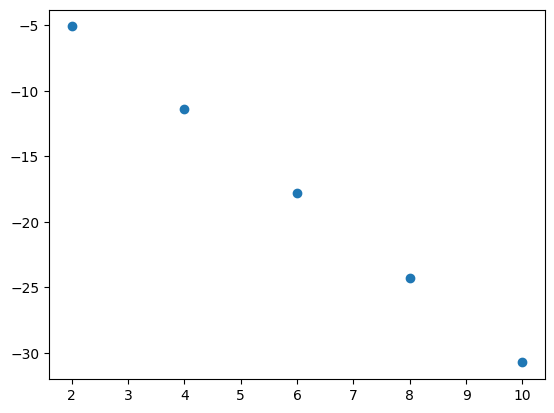

In [ ]:
plt.scatter(ns,total_energies)
plt.show()

**Exercise 6:** Now let's create a similar plot for the HOMO-LUMO energy gap. Copy your code from your answers to Exercises 5 and 6, and modify it so that instead of storing the total $\pi$-electron energy of each molecule, you are storing the HOMO-LUMO energy gap. Then plot the HOMO-LUMO gap against the length of the molecule on a graph. Is the trend the same as for the total energies?

[10.2, 6.303946685248926, 4.539427052708813, 3.542422824405377, 2.9032227007750167]


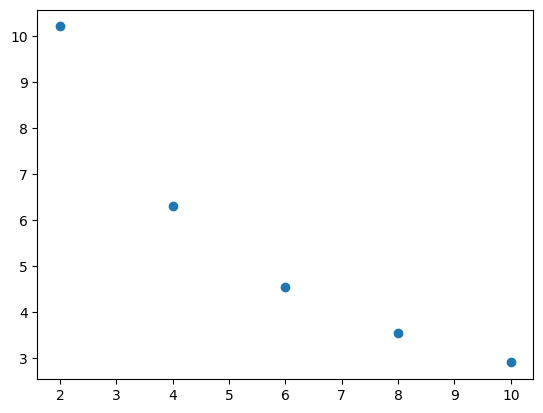

In [ ]:
ns = [2,4,6,8,10]
gaps = []
for n in ns:
  H = linear_Hamiltonian(n,alpha,beta)
  energies, mos = np.linalg.eigh(H)
  gaps.append(energies[n//2] - energies[n//2-1])
print(gaps)
plt.scatter(ns,gaps)
plt.show()

**Optional Exercise:** Make your graphs look prettier! You can add axis labels and a title using the commands below, and you can find out how to change the colour, shape and size of the points by [reading the documentation for `plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

```
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Title')
```

## **Section F: Cyclic Molecules**
---

So far we've just thought about linear conjugated molecules. There are some very important cyclic conjugated molecules, such as benzene; Hückel Theory can describe those as well! Let's see how the results compare.

Before we do any coding, we need to understand how Hückel theory is different for cyclic molecules. Remember, we started off looking at 1,3-butadiene and calculated the Hamiltonian for this molecules using the following rules:
*   Molecular orbitals are built from a linear combination of atomic p orbitals (i.e. the basis of our matrix is p orbitals).
*   The system is defined by two parameters:
    *  $\alpha$, the energy of an electron in a p orbital.
    *  $\beta$, the interaction energy of two neighbouring p orbitals.
*   Orbitals which aren't neighbours don't interact.

![Butadiene](https://drive.google.com/uc?id=1D9YpzsfmZv-uj0WwrKoMRblJrpL40VKC)

Applying these rules gives us the following Hamiltonian.
$$
\\
\mathbf{H}_{\textrm{butadiene}} = \left( \array{\alpha & \beta & 0 & 0 \\ \beta & \alpha & \beta & 0 \\ 0 & \beta & \alpha & \beta \\ 0 & 0 & \beta & \alpha} \right)\\
$$
**Exercise 1:** How will the Hamiltonian for cyclobutadiene be different to $\mathbf{H}_{\textrm{butadiene}}$? Work through the rules above and write down on paper or a tablet the Hückel Hamiltonian for cyclobutadiene.

![Butadiene](https://drive.google.com/uc?id=1j8sUf5OMoWJsRgnXYS20tUlUItGgXv0S)

$$
\\
\mathbf{H}_{\textrm{butadiene}} = \left( \array{\alpha & \beta & 0 & \beta \\ \beta & \alpha & \beta & 0 \\ 0 & \beta & \alpha & \beta \\ \beta & 0 & \beta & \alpha} \right)\\
$$

**Exercise 2:** Once you've worked out what the Hamiltonian should look like, modify the function below to make it produce the correct Hamiltonian. In this code, the Hamiltonian is stored in the variable `H`, which is an $n\times n$ matrix. (Hint: If you want to select the last row or column of the matrix, you can use `-1` as the number of the row or column.)

This code might look hard to understand to start with, but there are helpful comments which explain what each line does. Read through the code carefully before you try to make changes, but don't be scared to try something and see what happens!

In [ ]:
def cyclic_Hamiltonian(n,alpha,beta):
  '''
  This function defines the Hückel Hamiltonian of a linear conjugated hydrocarbon
  You don't need to change this function!

  Arguments:
      n: the number of carbon atoms in the molecule
      alpha: the energy of a carbon p orbital
      beta: the interaction energy between neighbouring carbon atoms

  Retuns:
      H: The Hückel Hamiltonian

  '''

  # This line defines an nxn Hamiltonian full of zeros
  H = np.zeros((n,n))

  # Loop over each row of the matrix
  for i in range(n):
    # Set the diagonal element of the Hamiltonian equal to alpha
    H[i,i] = alpha
    # Check if this carbon atom is the last atom
    if i+1 == n:
      # If it is, do nothing
      H[i,0] = beta
    else:
      # If it isn't, set the interaction energy between this atom and its next neighbour.
      H[i,i+1] = beta

    # Check if this carbon atom is the first atom
    if i == 0:
      # If it is, do nothing
      H[i,-1] = beta
    else:
      # If it isn't, set the interaction energy between this atom and its peevious neighbour.
      H[i,i-1] = beta

  return H

print(cyclic_Hamiltonian(4,alpha,beta))

[[-0.  -5.1  0.  -5.1]
 [-5.1 -0.  -5.1  0. ]
 [ 0.  -5.1 -0.  -5.1]
 [-5.1  0.  -5.1 -0. ]]


**Exercise 3:** Copy the code which was your answer to Exercise 4 in Section E - this was the code to calculate the total $\pi$-electron energy of linear molecules. Modify it so that it calculates the total $\pi$-electron energy of cyclic molecules instead. **Make sure you change the name of the variable you use to store the total energies to something new.**

In [ ]:
ns = [2,4,6,8,10]
total_energies_cyclic = []
for n in ns:
  H = cyclic_Hamiltonian(n,alpha,beta)
  energies, mos = np.linalg.eigh(H)
  total_energies_cyclic.append(np.sum(energies[:n//2]))
print(total_energies_cyclic)

[-5.1, -10.2, -20.4, -24.624978336205572, -33.007893370497854]


**Exercise 4:** We can plot the energies of the linear and cyclic conjugated hydrocarbons on the same graph. To do this, use two `plot.scatter(X,Y)` functions before writing `plt.show()`, one plotting the total $\pi$-electron energy of the linear molecules, and the other plotting the total $\pi$-electron energy of the cyclic molecules.

To make it a bit clearer what's happening on the graph, we can add a label to each dataset by adding an extra argument `label="data"` after `X` and `Y` when we use the function `plt.scatter`. In order to show these lables on the graph, we need to use the command `plt.legend()`.

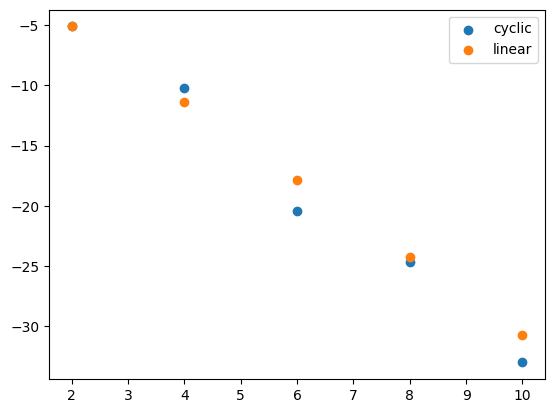

In [ ]:
plt.scatter(ns,total_energies_cyclic,label='cyclic')
plt.scatter(ns,total_energies,label='linear')
plt.legend()
plt.show()

Can you use your chemistry knowledge to explain this graph?

**Optional Exercise:** Make your graphs look prettier! You can add axis labels and a title, using the commands below, and you can find out how to change the colour, shape and size of the points by [reading the documentation for `plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

```
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Title')
```

# Please return to the survey you began at the start of the workshop and complete it. Thank you very much!